In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: Candy Valentina López Villanueva
---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y encuentre $f'(\pi/8)$ variando el $h$ y encuentre el error de convergencia, comparando su respuesta con el valor exacto.

* Determine $f''(\pi/8)$ con $h = 0.05$ y encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



In [ ]:
import numpy as np

def five_point_derivative(f, x, h):
    """
    Calcula la primera derivada de la función f en el punto x usando el método de cinco puntos.

    Parámetros:
    f : función
        Función a derivar.
    x : float
        Punto donde se evalúa la derivada.
    h : float
        Paso para la derivación.

    Retorna:
    float
        Aproximación de la derivada de f en x.
    """
    return (-f(x + 2*h) + 8*f(x + h) - 8*f(x - h) + f(x - 2*h)) / (12*h)


def five_point_second_derivative(f, x, h):
    """
    Calcula la segunda derivada de la función f en el punto x usando el método de cinco puntos.

    Parámetros:
    f : función
        Función a derivar.
    x : float
        Punto donde se evalúa la segunda derivada.
    h : float
        Paso para la derivación.

    Retorna:
    float
        Aproximación de la segunda derivada de f en x.
    """
    return (-f(x + 2*h) + 16*f(x + h) - 30*f(x) + 16*f(x - h) - f(x - 2*h)) / (12*h**2)


# Parámetros del problema
f = np.cos
x_eval = np.pi / 8
h_values = [0.1, 0.05, 0.01, 0.001]

print("Derivada en x=π/8 con valores de h:")
for h in h_values:
    deriv = five_point_derivative(f, x_eval, h)
    exact_deriv = -np.sin(x_eval)
    error = np.abs(deriv - exact_deriv)
    print(f"h={h:.3f} -> derivada ≈ {deriv:.8f}, error ≈ {error:.2e}")

# Segunda derivada en x=π/8 con h=0.05
h_second = 0.05
second_deriv = five_point_second_derivative(f, x_eval, h_second)
exact_second_deriv = -np.cos(x_eval)
error_second = np.abs(second_deriv - exact_second_deriv)

print("\nSegunda derivada en x=π/8 con h=0.05:")
print(f"Aproximación ≈ {second_deriv:.8f}")
print(f"Exacta ≈ {exact_second_deriv:.8f}")
print(f"Error ≈ {error_second:.2e}")

# Pregunta: ¿El error mejora con un h menor o mayor?
print("\nRespuesta a la pregunta sobre el error de la segunda derivada:")
print("El error de la aproximación generalmente mejora con un h más pequeño,")
print("hasta cierto punto donde errores numéricos (por redondeo) pueden volverlo a aumentar.")

Derivada en x=π/8 con valores de h:
h=0.100 -> derivada ≈ -0.38268216, error ≈ 1.27e-06
h=0.050 -> derivada ≈ -0.38268335, error ≈ 7.97e-08
h=0.010 -> derivada ≈ -0.38268343, error ≈ 1.28e-10
h=0.001 -> derivada ≈ -0.38268343, error ≈ 1.17e-14

Segunda derivada en x=π/8 con h=0.05:
Aproximación ≈ -0.92387947
Exacta ≈ -0.92387953
Error ≈ 6.41e-08

Respuesta a la pregunta sobre el error de la segunda derivada:
El error de la aproximación generalmente mejora con un h más pequeño,
hasta cierto punto donde errores numéricos (por redondeo) pueden volverlo a aumentar.


En general, el error disminuye con $h$ menor, porque la aproximación es más precisa (orden de error $\propto h^4$). Sin embargo, si $h$ es demasiado pequeño, pueden aparecer errores numéricos por redondeo y la aproximación puede empeorar. Por lo tanto, hay un valor óptimo de $h$ que minimiza el error total (error de truncamiento y redondeo).

#2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`. Realice un gráfico logaritmico de los errores.

*   ¿Cuál será el valor óptimo de $h$?

Derivadas con numdifftools:
f'(x=2.0) ≈ 22.16716830 con error ≈ 2.66e-13
f''(x=2.0) ≈ 29.55622440 con error ≈ 5.93e-11

Derivadas con numpy.gradient:
f'(x=2.0) ≈ 21.05158515 con error ≈ 1.12e+00
f''(x=2.0) ≈ 28.20370369 con error ≈ 1.35e+00


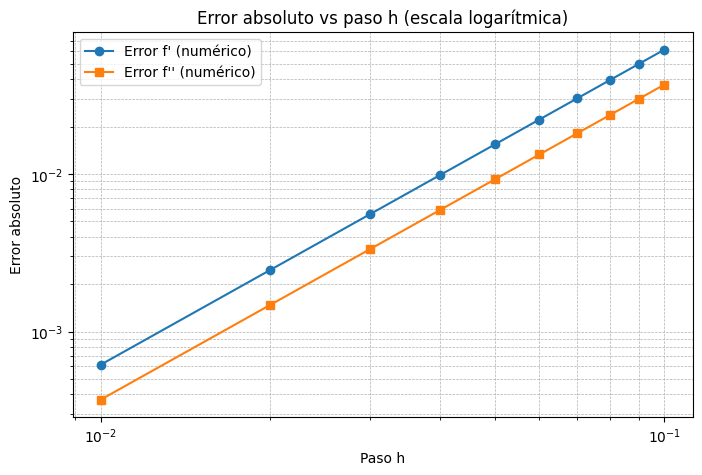

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import numdifftools as nd

# Definimos la función f(x)
def f(x):
    return x * np.exp(x)

# Derivadas exactas
def f_prime_exact(x):
    return np.exp(x) * (1 + x)

def f_double_prime_exact(x):
    return np.exp(x) * (2 + x)

# Puntos del arreglo
x_points = np.linspace(1.8, 2.2, 6)
x_eval = 2.0  # punto donde queremos la derivada

# Valores de h a analizar
h_values = np.linspace(0.01, 0.1, 10)

# Listas para almacenar errores
errors_f1 = []
errors_f2 = []

# Bucle sobre los valores de h
for h in h_values:
    # Aproximaciones de primera derivada usando diferencias centradas
    f1_num = (f(x_eval + h) - f(x_eval - h)) / (2 * h)

    # Aproximaciones de segunda derivada
    f2_num = (f(x_eval + h) - 2 * f(x_eval) + f(x_eval - h)) / (h**2)

    # Errores comparados con las derivadas exactas
    error_f1 = np.abs(f1_num - f_prime_exact(x_eval))
    error_f2 = np.abs(f2_num - f_double_prime_exact(x_eval))

    errors_f1.append(error_f1)
    errors_f2.append(error_f2)

# Derivadas con numdifftools (alternativa a scipy.misc.derivative)
f1_nd = nd.Derivative(f)(x_eval)
f2_nd = nd.Derivative(f, n=2)(x_eval)

print("Derivadas con numdifftools:")
print(f"f'(x=2.0) ≈ {f1_nd:.8f} con error ≈ {np.abs(f1_nd - f_prime_exact(x_eval)):.2e}")
print(f"f''(x=2.0) ≈ {f2_nd:.8f} con error ≈ {np.abs(f2_nd - f_double_prime_exact(x_eval)):.2e}")

# Derivadas con numpy.gradient usando 6 puntos
f_values = f(x_points)
gradients = np.gradient(f_values, x_points)
second_gradients = np.gradient(gradients, x_points)

idx = (np.abs(x_points - x_eval)).argmin()
f1_gradient = gradients[idx]
f2_gradient = second_gradients[idx]

print("\nDerivadas con numpy.gradient:")
print(f"f'(x=2.0) ≈ {f1_gradient:.8f} con error ≈ {np.abs(f1_gradient - f_prime_exact(x_eval)):.2e}")
print(f"f''(x=2.0) ≈ {f2_gradient:.8f} con error ≈ {np.abs(f2_gradient - f_double_prime_exact(x_eval)):.2e}")

# Gráfico log-log de los errores
plt.figure(figsize=(8, 5))
plt.loglog(h_values, errors_f1, 'o-', label="Error f' (numérico)")
plt.loglog(h_values, errors_f2, 's-', label="Error f'' (numérico)")
plt.xlabel('Paso h')
plt.ylabel('Error absoluto')
plt.title('Error absoluto vs paso h (escala logarítmica)')
plt.legend()
plt.grid(True, which='both', ls='--', lw=0.5)
plt.show()

**1. Valores de las derivadas:**

***Con numdifftools:***

•	Primera derivada $f’(2.0) \approx 22.16716830$ con error de $\approx 2.66 \times 10^{-13}$.

•	Segunda derivada $f’’(2.0) \approx 29.55622440$ con error de $\approx 5.93 \times 10^{-11}$.

Esto demuestra que numdifftools obtiene resultados muy precisos para este punto.

***Con numpy.gradient:***

•	Primera derivada $f’(2.0) \approx 21.05158515$ con error de $\approx 1.12$.

•	Segunda derivada $f’’(2.0) \approx 28.20370369$ con error de $\approx 1.35$.

El método de numpy.gradient es menos preciso que numdifftools en este caso, probablemente porque numpy.gradient usa aproximaciones de diferencias finitas con pasos fijos y no está diseñado específicamente para obtener derivadas en puntos concretos con precisión alta.

**De acuerdo a la gráfica:**

•	Ambos errores (de la primera y segunda derivada) disminuyen al reducir $h$.

•	Hay un comportamiento lineal en la escala log-log, indicando que el error sigue una ley de potencia con $h$.

•	Para los $h$ más pequeños probados ($h=0.01$), los errores llegan alrededor de $10^{-3}$.

•	No se ve todavía un “mínimo” en la curva: significa que no se ha alcanzado aún la zona donde los errores de redondeo se vuelven importantes.

En general, lo anterior es normal debido a que el error total es la suma de error de truncamiento (que disminuye con $h$) y error de redondeo (que crece con $1/h$). Los valores de $h$ aún están en la región donde el error de truncamiento domina.

**Valor Óptimo de $h$:**

• Como aún no se ve un mínimo en las curvas, probablemente el error mínimo estaría para $h$ menor a $0.01$.

• En la práctica, para dobles precisión en Python, ese mínimo suele estar en torno a $h \approx 10^{-5}$ a $10^{-6}$.

• Si se quisieras determinar exactamente, se podría extender la gráfica para $h$ menores y ver dónde el error total empieza a crecer de nuevo (ahí está el valor óptimo de $h$).

**Código para buscar el Valor Óptimo de $h$**

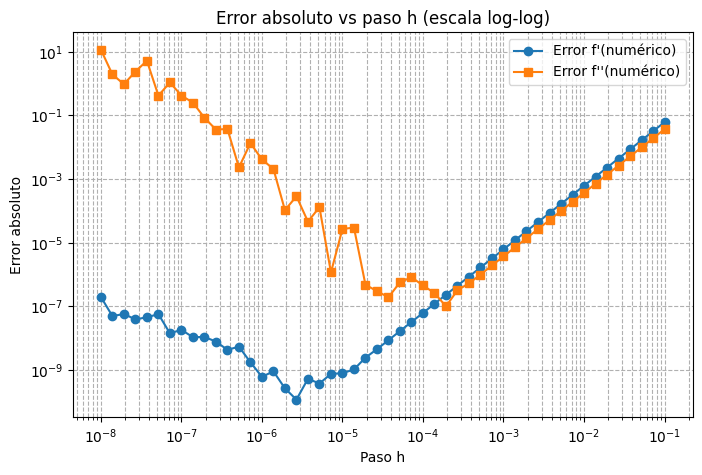

Valor óptimo de h para f' ≈ 2.68e-06
Valor óptimo de h para f'' ≈ 1.93e-04


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numdifftools import Derivative

# Definir la función
def f(x):
    return x * np.exp(x)

# Derivadas exactas en x=2.0
x0 = 2.0
f1_exact = np.exp(x0) * (x0 + 1)
f2_exact = np.exp(x0) * (x0 + 2)

# Rango más amplio y fino para h
h_values = np.logspace(-8, -1, 50)
errors_f1 = []
errors_f2 = []

for h in h_values:
    # Derivadas numéricas por diferencias finitas centradas
    f1_num = (f(x0 + h) - f(x0 - h)) / (2 * h)
    f2_num = (f(x0 + h) - 2 * f(x0) + f(x0 - h)) / (h**2)

    # Errores absolutos
    errors_f1.append(np.abs(f1_num - f1_exact))
    errors_f2.append(np.abs(f2_num - f2_exact))

# Convertir a arrays para facilidad
errors_f1 = np.array(errors_f1)
errors_f2 = np.array(errors_f2)

# Graficar en log-log
plt.figure(figsize=(8, 5))
plt.loglog(h_values, errors_f1, 'o-', label="Error f'(numérico)")
plt.loglog(h_values, errors_f2, 's-', label="Error f''(numérico)")
plt.xlabel("Paso h")
plt.ylabel("Error absoluto")
plt.legend()
plt.grid(True, which='both', ls='--')
plt.title("Error absoluto vs paso h (escala log-log)")
plt.show()

# Encontrar el h óptimo (mínimo error)
h_opt_f1 = h_values[np.argmin(errors_f1)]
h_opt_f2 = h_values[np.argmin(errors_f2)]
print(f"Valor óptimo de h para f' ≈ {h_opt_f1:.2e}")
print(f"Valor óptimo de h para f'' ≈ {h_opt_f2:.2e}")

**Interpretación:**

***Escala log-log:***

La gráfica muestra el error absoluto de la primera derivada (en azul) y la segunda derivada (en naranja) en función del tamaño del paso $h$, todo en escala logarítmica.

***Curva de error con un mínimo claro:***

El error primero disminuye al reducir $h$, pero luego comienza a aumentar otra vez.

•	Esto ocurre porque al inicio, disminuir $h$ reduce el error de truncamiento (la diferencia entre la derivada real y la aproximación de la fórmula de diferencias finitas).

•	Sin embargo, si $h$ es demasiado pequeño, aparecen errores de redondeo debido a la precisión finita de la máquina (errores numéricos).

•	El punto donde estos dos errores (truncamiento y redondeo) se equilibran corresponde al valor óptimo de $h$.

***Valor óptimo de $h$:***

•	Para la primera derivada $f’$, el error mínimo se alcanza con $h \approx 2.68 \times 10^{-6}$.

•	Para la segunda derivada $f’’$, el mínimo es con $h \approx 1.93 \times 10^{-4}$.

Esto significa que estos valores de $h$ permiten obtener la derivada más precisa posible con diferencias finitas, dadas las limitaciones de precisión de la máquina.

**Conclusiones:**

***Equilibrio error de truncamiento / redondeo:***

•	A grandes $h$, el error de truncamiento domina (las aproximaciones no son lo bastante precisas porque $h$ es demasiado grande).

•	A $h$ demasiado pequeño, los errores de redondeo se vuelven importantes y hacen que el error vuelva a crecer.

•	Los $h$ óptimos hallados son el punto donde estos dos errores se compensan.

***Primera derivada vs segunda derivada:***

•	Para la segunda derivada, el $h$ óptimo es mayor que para la primera. Esto se debe a que calcular la segunda derivada es más sensible al ruido numérico (más términos de diferencias, más potencial de error), por lo que conviene usar un paso un poco más grande.